Importing the important or required libraries for the model building

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df=pd.read_csv("transactions.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,0
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,0
...,...,...,...,...,...,...,...,...,...,...
199994,201,PAYMENT,1274.97,C361372882,69376.00,68101.03,M671547467,0.00,0.00,0
199995,212,CASH_OUT,204041.98,C1621547576,40423.00,0.00,C1571552280,0.00,204041.98,0
199996,160,CASH_IN,66378.61,C1431532774,2852895.88,2919274.49,C1831159716,264223.39,197844.78,0
199997,12,CASH_IN,87473.93,C695681900,1674588.27,1762062.20,C371793088,245563.25,158089.32,0


In [4]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

Feature Extraction

Deleting non required data columns from the data set and storing it in the other data set

In [6]:
train=df[['step', 'type', 'amount','oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFraud']]

In [7]:
train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,158007.12,0.00,0.00,474016.32,1618631.97,0
1,236,CASH_OUT,457948.30,0.00,0.00,2720411.37,3178359.67,0
2,37,CASH_IN,153602.99,11160428.67,11314031.67,3274930.56,3121327.56,0
3,331,CASH_OUT,49555.14,10865.00,0.00,0.00,49555.14,0
4,250,CASH_OUT,29648.02,0.00,0.00,56933.09,86581.10,0
...,...,...,...,...,...,...,...,...
199994,201,PAYMENT,1274.97,69376.00,68101.03,0.00,0.00,0
199995,212,CASH_OUT,204041.98,40423.00,0.00,0.00,204041.98,0
199996,160,CASH_IN,66378.61,2852895.88,2919274.49,264223.39,197844.78,0
199997,12,CASH_IN,87473.93,1674588.27,1762062.20,245563.25,158089.32,0


In [8]:
#converting the char data to numerical
train["type"].unique()
train.loc[:, "type"] = train["type"].str.replace("CASH_OUT", "0")
train.loc[:, "type"] = train["type"].str.replace("CASH_IN", "1")
train.loc[:, "type"] = train["type"].str.replace("PAYMENT", "2")
train.loc[:, "type"] = train["type"].str.replace("TRANSFER", "3")
train.loc[:, "type"] = train["type"].str.replace("DEBIT", "4")

# 'CASH_OUT'=0
# 'CASH_IN'=1
# 'PAYMENT'=2 
# 'TRANSFER'=3 
# 'DEBIT'=4

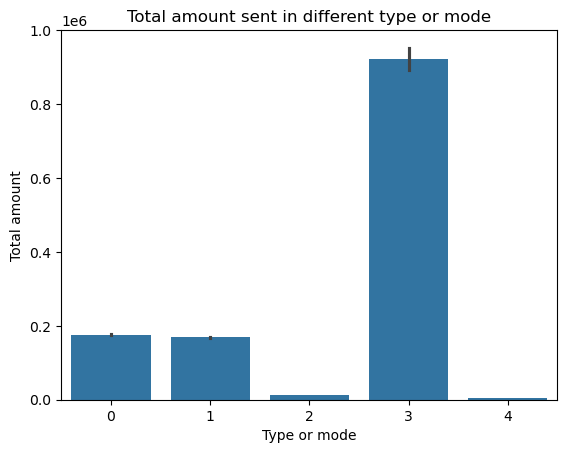

In [9]:
#Analysis of the data
sns.barplot(x=train["type"],y=train["amount"])
plt.title("Total amount sent in different type or mode")
plt.xlabel("Type or mode")
plt.ylabel("Total amount")
plt.show()

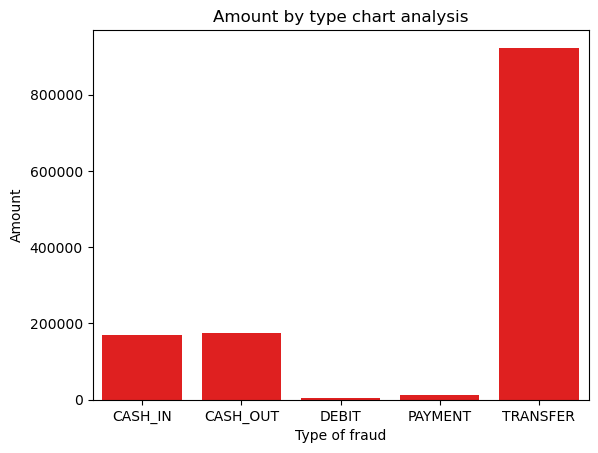

In [10]:
Amount_by_type=df.groupby("type")["amount"].mean().reset_index()
sns.barplot(data=Amount_by_type,x="type",y="amount",color="red")
plt.title("Amount by type chart analysis")
plt.xlabel("Type of fraud")
plt.ylabel("Amount")
plt.show()

Spliting the data into 2parts input and output

In [11]:
#input 
x=train[['step', 'type', 'amount','oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']]
#output
y=train['isFraud']

As it is unbalanced data set so here we use under_sampling because the data is huge 

In [12]:
#To make the data balanced we use here under sampling

from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(random_state=23)

x_resample,y_resample=ros.fit_resample(x,y)

In [13]:
y_resample.value_counts()

isFraud
0    199717
1    199717
Name: count, dtype: int64

In [14]:
len(x_resample)

399434

Training and spliting data

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=2)

In [16]:
x_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
224494,442,3,1487505.07,1487505.07,0.00,0.00,0.00
258082,173,0,2177218.43,2177218.43,0.00,0.00,2177218.43
311775,536,0,285382.07,285382.07,0.00,0.00,285382.07
128327,137,1,161467.26,2961729.54,3123196.80,257126.59,95659.32
272478,608,0,27985.73,27985.73,0.00,5079508.41,5107494.15
...,...,...,...,...,...,...,...
84434,235,0,46973.40,0.00,0.00,503325.97,550299.37
95816,2,1,49512.11,5555977.62,5605489.74,498678.55,449166.44
203245,400,3,436757.76,436757.76,0.00,0.00,0.00
100879,402,1,235469.90,3399928.58,3635398.48,1165973.41,930503.51


Calling the model and training the model on the data set

In [17]:
#model calling
model=LogisticRegression(max_iter=1000)

In [18]:
#traing the model
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
#predicting the model output

y_pred=model.predict(x_test)

In [20]:
#calculating accuuracy
print(classification_report(y_test,y_pred)) #we got 97% accuraacy

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     39744
           1       0.96      0.98      0.97     40143

    accuracy                           0.97     79887
   macro avg       0.97      0.97      0.97     79887
weighted avg       0.97      0.97      0.97     79887



Dump and loading the built model

In [21]:
import joblib

joblib.dump(model,"model.pkl")

['model.pkl']

In [22]:
joblib.load("model.pkl")

LogisticRegression(max_iter=1000)